# **1. Employee Attrition Analysis**

**Features:**
1. Age: The age of the employee
2. Attrition: Whether the employee has left the company or not.
3. BusinessTravel: The frequency of business travel
4. DailyRate: The employee’s daily rate of pay
5. Department: The department in which the employee works
6. DistanceFromHome: The distance between the employee’s home and workplace
7. Education: The highest level of education attained by the employee
8. EducationField: The field in which the employee’s education is focused
9. EmployeeCount: A count of the employees in the company
10. EmployeeNumber: A unique identifier for each employee
11. EnvironmentSatisfaction: The employee’s level of satisfaction with their work environment
12. Gender: The employee’s gender
13. HourlyRate: The employee’s hourly rate of pay
14. JobInvolvement: The employee’s level of involvement in their job
15. JobLevel: The level of the employee’s job within the company
16. JobRole: The employee’s job role
17. JobSatisfaction: The employee’s level of satisfaction with their job
18. MaritalStatus: The employee’s marital status
19. MonthlyIncome: The employee’s monthly income
20. MonthlyRate: The employee’s monthly rate of pay
21. NumCompaniesWorked: The number of companies the employee has worked for in the past
22. Over18: Whether the employee is over 18 years old or not
23. OverTime: Whether the employee works overtime or not
24. PercentSalaryHike: The percentage increase in the employee’s salary from the previous year
25. PerformanceRating: The employee’s performance rating
26. RelationshipSatisfaction: The employee’s level of satisfaction with their relationships at work
27. StandardHours: The standard number of working hours per day
28. StockOptionLevel: The employee’s stock option level
29. TotalWorkingYears: The employee’s total number of years working
30. TrainingTimeLastYear: The number of hours the employee spent on training last year
31. WorkLifeBalance: The employee’s level of balance between work and personal life
32. YearsAtCompany: The number of years the employee has been working for the company
33. YearsInCurrentRole: Number of years in the current role
34. YearsSinceLastPromotion: Number of years since last promotion
35. YearsWithCurrManager: Number of years with the current manager

**Task:** Analyze the relationship between the characteristics of employees and their attrition status to develop a predictive model that can identify which employees are most likely to leave the company.

**Summary:**

Employee attrition analysis is a type of behavioural analysis where we study the behaviour and characteristics of the employees who left the organization and compare their characteristics with the current employees to find the employees who may leave the organization soon.

A high rate of attrition of employees can be expensive for any company in terms of recruitment and training costs, loss of productivity and morale reduction of employees. By identifying the causes of attrition, a company can take measures to reduce the attrition of employees and maintain precious employees.

For the task of employee attrition analysis, we need to have a dataset of employees with their attrition status and features about the career of employees in a specific company. I found an ideal dataset for this task. You can download the dataset from https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

**Looking for missing values**

In [ ]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Distribution of the age in the dataset**

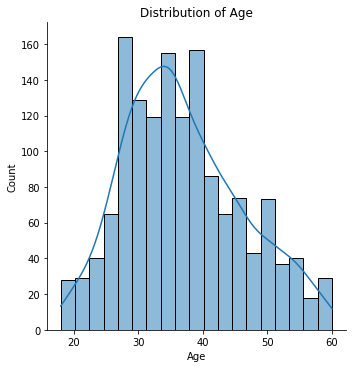

In [ ]:
sns.displot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

**Percentage of attrition by department**

In [ ]:
# Filter the data to show only "Yes" values in the "Attrition" column
attrition_data = data[data['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by = attrition_data.groupby(['Department']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Department'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Department', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

We can see that the Research & Development department has a high attrition rate. 

**Percentage of attrition by education field**

In [ ]:
attrition_by = attrition_data.groupby(['EducationField']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['EducationField'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

We can see that the employees with Life Sciences as an education field have a high attrition rate.

**Percentage of attrition by number of years at the company**

In [ ]:
attrition_by = attrition_data.groupby(['YearsAtCompany']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['YearsAtCompany'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years at Company', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

We can see that most of the employees leave the organization after completing a year.

**Percentage of attrition by the number of years since the last promotion**

In [ ]:
attrition_by = attrition_data.groupby(['YearsSinceLastPromotion']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['YearsSinceLastPromotion'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years Since Last Promotion', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

We can see that the employees who don’t get promotions leave the organization more compared to the employees who got promotions.

**Percentage of attrition by gender**

In [ ]:
attrition_by = attrition_data.groupby(['Gender']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Gender'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Gender', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

Men have a high attrition rate compared to women

**Attrition by analyzing the relationship between monthly income and the age of the employees**

In [ ]:
fig = px.scatter(data, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")
fig.show()

We can see that as the age of the person increases, monthly income increases. We can also see a high rate of attrition among the employees with low monthly incomes.

# **2. Employee Attrition Prediction Model**

This dataset has a lot of features having categorical values. I will convert those categorical variables into numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['Over18'] = le.fit_transform(data['Over18'])
data['OverTime'] = le.fit_transform(data['OverTime'])

Observing the correlation between features

In [ ]:
correlation = data.corr()
print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

I will add a new feature to this data known as the satisfaction score

In [ ]:
data['SatisfactionScore'] = data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['RelationshipSatisfaction']

Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

Train an employee attrition prediction model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Evaluate the model's performance
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8662131519274376


Employee attrition analysis is a kind of behavioural analysis where we study the behaviour and characteristics of the employees who left the organization and compare their characteristics with the current employees to find the employees who may leave the organization soon. 

